In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import random

In [49]:
# generate 2d data
n = 600
alpha = 0.1
n1 = np.sum(np.random.rand(n, 1) < alpha)
n2 = n - n1

In [50]:
n1, n2

(68, 532)

In [51]:
x1 = np.random.randn(n1, 2)*np.array([1, 3]) + np.array([2, 0])
x2 = np.random.randn(n2, 2)*np.array([1, 3]) + np.array([-2, 0])

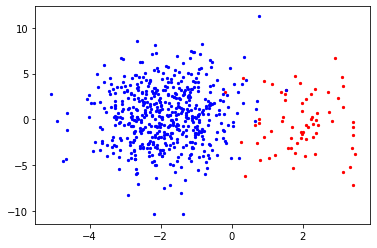

In [52]:
plt.scatter(x1[:, 0], x1[:, 1], c = "r", s = 5)
plt.scatter(x2[:, 0], x2[:, 1], c = "b", s = 5)

In [53]:
np.std(np.concatenate([x1 - mu1_hat,x2 - mu2_hat]), axis = 0)

array([0.99503093, 3.18676507])

In [54]:
mu1_hat = np.mean(x1, axis = 0)
mu2_hat = np.mean(x2, axis = 0)
std1, std2 = np.var(np.concatenate([x1 - mu1_hat,x2 - mu2_hat]), axis = 0)
sigma_hat_inv = 1/(std1* std2) * np.array([[std2, 0], [0, std1]])
sigma_hat_inv

array([[1.01485553, 0.        ],
       [0.        , 0.09959974]])

In [64]:
a = sigma_hat_inv.dot(mu1_hat - mu2_hat)
b = -0.5 * ((mu1_hat.T).dot(sigma_hat_inv).dot(mu1_hat) \
            - (mu2_hat.T).dot(sigma_hat_inv).dot(mu2_hat)) + np.log(n1/n2)
a, b

(array([ 3.91791687, -0.07851296]), -2.1878460243791147)

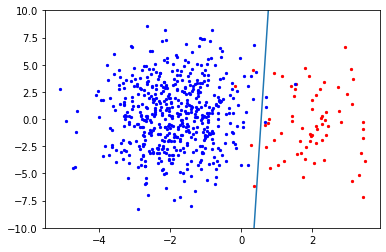

In [63]:
# visualization

X1 = np.linspace(start=-1, stop=1, num=5000)
X2  = -a[0]*X1/a[1] - b/a[1]
plt.scatter(x1[:, 0], x1[:, 1], c = "r", s = 5)
plt.scatter(x2[:, 0], x2[:, 1], c = "b", s = 5)
plt.plot(X1, X2)
plt.ylim(-10, 10)
plt.show()

# HW3

In [17]:
data = loadmat('digit.mat')
train = data['X']
test = data['T']

In [19]:
test.shape, train.shape

((256, 200, 10), (256, 500, 10))

In [39]:
test.shape[1]

200

(256,)


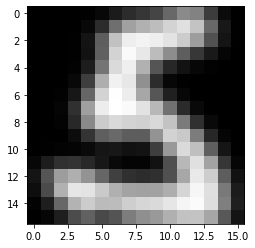

In [13]:
x=train[:, 24, 4]
print(x.shape)
plt.imshow(x.reshape(16, 16), 'gray')

In [5]:
# Make a classifier for one and two
mu1 = np.mean(train[:, :, 0], axis=1)
mu2 = np.mean(train[:, :, 1], axis=1)
S = (np.cov(train[:, :, 0]) + np.cov(train[:, :, 1])) / 2

In [44]:
# make a mu and sigma for all digit
# for HW
mus_list = []
S = 0
for i in range(10):
    mus_list.append(np.mean(train[:, :, i], axis = 1))
    S += np.cov(train[:, :, i])
S = S/10
invS = np.linalg.inv(S + 0.000001 * np.identity(256))

In [14]:
t = test[:, 0, 1]
invS = np.linalg.inv(S + 0.000001 * np.identity(256))
p1 = mu1[None, :].dot(invS).dot(t) - mu1[None, :].dot(invS).dot(mu1)/2
p2 = mu2[None, :].dot(invS).dot(t) - mu2[None, :].dot(invS).dot(mu2)/2
print(np.sign(p1 - p2))

[-1.]


In [24]:
t = test[:, :, 1]
p1 = mu1[None, :].dot(invS).dot(t) - mu1[None, :].dot(invS).dot(mu1[:, None]) / 2
p2 = mu2[None, :].dot(invS).dot(t) - mu2[None, :].dot(invS).dot(mu2[:, None]) / 2
result = np.sign(p1 - p2)

In [85]:
# calcurate each p 
# for HW
test_num = test.shape[1]
results = np.zeros((10, 10))
for i in range(10):
    t = test[:, :, i]
    pbox = np.zeros((10, 200))
    for j in range(10):
        pbox[j, :] = mus_list[j][None, :].dot(invS).dot(t) \
        - mus_list[j][None, :].dot(invS).dot(mus_list[j][:, None]) / 2
    u, counts = np.unique(np.argmax(pbox, axis=0), return_counts=True)
    for k in range(len(u)):
        results[i, u[k]] = counts[k]

In [86]:
results

array([[199.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  0., 169.,   8.,   8.,   1.,   2.,   4.,   8.,   0.,   0.],
       [  0.,   0., 182.,   1.,   5.,   0.,   2.,   8.,   1.,   1.],
       [  2.,   2.,   0., 182.,   0.,   1.,   0.,   3.,  10.,   0.],
       [  0.,   0.,  21.,   4., 162.,   1.,   0.,   4.,   4.,   4.],
       [  1.,   2.,   0.,   1.,   5., 185.,   0.,   3.,   0.,   3.],
       [  2.,   0.,   1.,   5.,   1.,   0., 181.,   0.,   9.,   1.],
       [  0.,   1.,  16.,   6.,   6.,   0.,   1., 164.,   3.,   3.],
       [  1.,   0.,   0.,   8.,   0.,   0.,   7.,   2., 182.,   0.],
       [  0.,   0.,   3.,   0.,   0.,   4.,   0.,   1.,   0., 192.]])

In [27]:
print("The number of correct prediction: {}".format(np.sum(result == -1)))
print("The number of false prediction:   {}".format(np.sum(result != -1)))

The number of correct prediction: 198
The number of false prediction:   2


In [23]:
mu1.shape, mu1[None, :].shape, p1.shape

((256,), (1, 256), (1,))